In [2]:
# 공통: 데이터 로딩 및 전처리
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Seeds 데이터 로드
url = "https://raw.githubusercontent.com/Kim-TaeWook/AI-class/refs/heads/main/week12/seeds_dataset.txt"
col_names = [
    "Area", "Perimeter", "Compactness", "Kernel_Length", "Kernel_Width",
    "Asymmetry_Coeff", "Kernel_Groove_Length", "Target"
]

# ✔️ r'' 로 문자열 선언하여 정규표현식 오류 방지
df = pd.read_csv(url, sep=r'\s+', engine='python', header=None, names=col_names)
print(df.head())

    Area  Perimeter  Compactness  Kernel_Length  Kernel_Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry_Coeff  Kernel_Groove_Length  Target  
0            2.221                 5.220       1  
1            1.018                 4.956       1  
2            2.699                 4.825       1  
3            2.259                 4.805       1  
4            1.355                 5.175       1  


In [3]:
# 입력과 타겟 분리
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values - 1  # 클래스 1~3 → 0~2로 조정

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 원-핫 인코딩
y_cat = to_categorical(y, num_classes=3)

# 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_seq = Sequential()
model_seq.add(Dense(16, activation='relu', input_shape=(7,)))
model_seq.add(Dense(8, activation='relu'))
model_seq.add(Dense(3, activation='softmax'))

model_seq.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_seq.summary()

# 학습
model_seq.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=16)

C:\Users\USER\anaconda3\envs\steam_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3633 - loss: 1.1950 - val_accuracy: 0.2353 - val_loss: 1.2502
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4423 - loss: 1.0857 - val_accuracy: 0.2353 - val_loss: 1.1809
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4365 - loss: 1.0957 - val_accuracy: 0.2353 - val_loss: 1.1162
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5107 - loss: 1.0027 - val_accuracy: 0.2941 - val_loss: 1.0625
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5653 - loss: 0.9170 - val_accuracy: 0.2941 - val_loss: 1.0169
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5445 - loss: 0.9066 - val_accuracy: 0.2941 - val_loss: 0.9747
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6557 - loss: 0.7975 - val_accuracy: 0.2941 - val_loss: 0.9367
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6221 - loss: 0.7962 - val_accuracy: 0.4706 - val_loss

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape=(7,))
hidden1 = Dense(16, activation='relu')(input_layer)
hidden2 = Dense(8, activation='relu')(hidden1)
output_layer = Dense(3, activation='softmax')(hidden2)

model_func = Model(inputs=input_layer, outputs=output_layer)
model_func.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_func.summary()

# 학습
model_func.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=16)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0651 - loss: 1.6275 - val_accuracy: 0.0588 - val_loss: 1.5422
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0384 - loss: 1.5356 - val_accuracy: 0.1765 - val_loss: 1.3521
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1273 - loss: 1.3965 - val_accuracy: 0.2353 - val_loss: 1.1945
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2559 - loss: 1.2856 - val_accuracy: 0.3529 - val_loss: 1.0540
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3761 - loss: 1.1658 - val_accuracy: 0.5294 - val_loss: 0.9417
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4174 - loss: 1.1144 - val_accuracy: 0.7059 - val_loss: 0.8532
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5378 - loss: 0.9914 - val_accuracy: 0.8235 - val_loss: 0.7679
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5765 - loss: 0.9552 - val_accuracy: 0.8235 - val_loss

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.d1 = Dense(16, activation='relu')
        self.d2 = Dense(8, activation='relu')
        self.d3 = Dense(3, activation='softmax')

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        return self.d3(x)

model_subclass = CustomModel()
model_subclass.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_subclass.build(input_shape=(None, 7))
model_subclass.summary()

# 학습
model_subclass.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=16)

C:\Users\USER\anaconda3\envs\steam_env\Lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'custom_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4949 - loss: 1.1114 - val_accuracy: 0.7059 - val_loss: 0.9331
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5625 - loss: 1.0477 - val_accuracy: 0.7647 - val_loss: 0.8602
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5370 - loss: 1.0088 - val_accuracy: 0.8235 - val_loss: 0.7896
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5767 - loss: 0.9622 - val_accuracy: 0.8235 - val_loss: 0.7256
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5805 - loss: 0.9201 - val_accuracy: 0.8235 - val_loss: 0.6671
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6002 - loss: 0.8820 - val_accuracy: 0.7647 - val_loss: 0.6109
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5839 - loss: 0.8641 - val_accuracy: 0.7647 - val_loss: 0.5669
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6615 - loss: 0.7943 - val_accuracy: 0.7647 - val_loss

In [7]:
loss, acc = model_seq.evaluate(X_test, y_test)
print("Sequential 정확도:", acc)

loss, acc = model_func.evaluate(X_test, y_test)
print("Functional API 정확도:", acc)

loss, acc = model_subclass.evaluate(X_test, y_test)
print("Subclassed Model 정확도:", acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9211 - loss: 0.3646
Sequential 정확도: 0.9285714030265808
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9211 - loss: 0.3517
Functional API 정확도: 0.9285714030265808
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8790 - loss: 0.3984
Subclassed Model 정확도: 0.8809523582458496


In [12]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Windows에서 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

def evaluate_model(model, name, X_test, y_test):
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    acc = metrics.accuracy_score(y_true, y_pred)
    print(f"✅ {name} 정확도: {acc:.4f}")

    print("▶ 분류 지표")
    print(classification_report(y_true, y_pred, zero_division=0))

    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
✅ Sequential 모델 정확도: 0.9286
▶ 분류 지표
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       1.00      1.00      1.00        14
           2       0.94      0.88      0.91        17

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



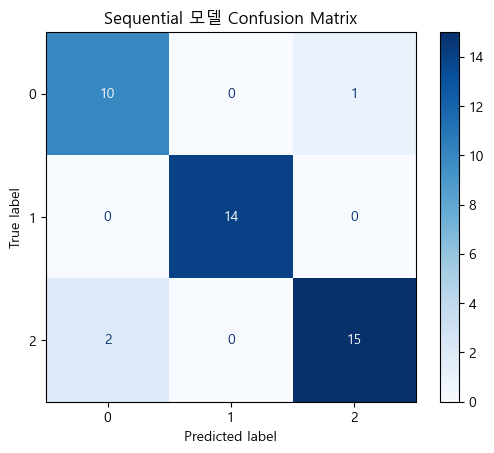

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
✅ Functional API 모델 정확도: 0.9286
▶ 분류 지표
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       1.00      1.00      1.00        14
           2       0.94      0.88      0.91        17

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



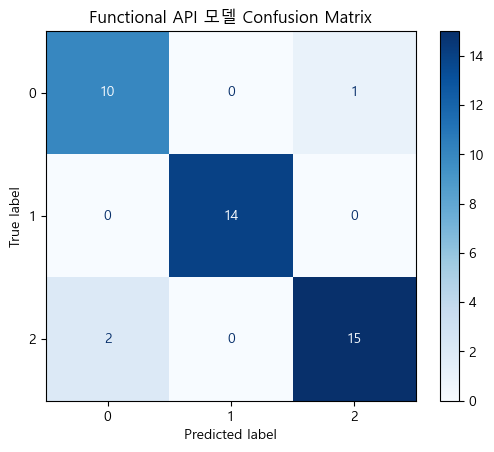

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
✅ Subclassed 모델 정확도: 0.8810
▶ 분류 지표
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       1.00      1.00      1.00        14
           2       0.88      0.82      0.85        17

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



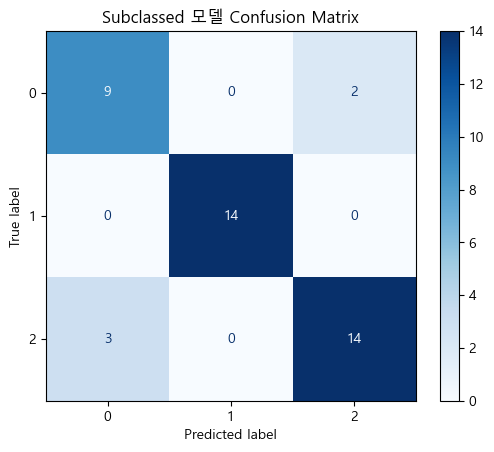

In [13]:
evaluate_model(model_seq, "Sequential 모델", X_test, y_test)
evaluate_model(model_func, "Functional API 모델", X_test, y_test)
evaluate_model(model_subclass, "Subclassed 모델", X_test, y_test)